** 스마트워치 센서 데이터 기반 행동 분류 2일차 **
# --------- 과제4 : 모델 튜닝 ---------


### [미션0] 과제 이해하기
* AI 모델은 튜닝을 통해 더 높은 정확도를 도출할 수 있습니다.
* Hyperparameter Tuning 기법과 Feature Selection 기법을 사용해 더 높은 정확도를 도출해 보세요.
   - Hyperparameter Tuning: AI 모델 학습시 매개변수를 조정하여 최상의 성능을 발휘하는 매개변수를 찾는 기법
   - Feature Selection: 모델링 시 raw data의 562개나 되는 모든 feature를 사용하는 것은 computing power와 memory 측면에서 매우 비효율적이기 때문에 결과 예측에 영향도가 높은 중요 feature만 선택하여 자원을 절약하고 모델의 성능을 높이는 기법
   



※ 미션완수 조건: XGBoost 알고리즘에 Hyperparameter Tuning 기법과 Feature Selection을 사용해, 정확도가 높아지도록 모델링을 수행해 보세요.

---

### [미션1] 데이터 불러오기
* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러리가 없을땐 !pip 명령어를 통해 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 'train_data.csv' 파일 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 현재 디렉토리 확인 -> train_data.csv 불러오기 -> 'subject' 제거 -> result3.csv 불러오기

In [1]:
# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출
# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
# 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용
## 추가로 필요한 라이브러리는 설치/호출 하세요

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import *


In [2]:
# 진행상황을 확인 하기 위한 라이브러리
from tqdm import tqdm

In [3]:
# 현재 디렉토리 위치 확인
# 아래의 결과는 강사의 현재 위치(에이블러 별 다를 수 있음)

os.getcwd()

'C:\\Users\\user\\KT수업자료\\미프 3차\\230921_미프3차_2일차_교육생용'

In [4]:
# 데이터셋 파일 불러오기
## data 변수에 train_data.csv 파일을 불러와서 할당해 주세요.
## train_data.csv 파일은 현재위치의 하위 data 폴더안에 있습니다. 
## 변수에 할당이 잘 되었는지 확인해 주세요. 

data = pd.read_csv('data/train_data.csv')
data.head(2)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING


In [5]:
# 불필요한 열 제거
## 'subject'열 은 데이터를 수집한 사람을 구별하기 위한 데이터 입니다.
## 'subject'열을 data 데이터프레임 변수 에서 제거해 주세요.
## 'subject'열이 잘 제거 되었는지 확인해 주세요.

data = data.drop('subject', axis = 1)
data.head(2)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING


In [6]:
# 데이터셋 파일 불러오기
## result3.csv 파일을 불러와서 result 변수에 할당해 주세요.
## result3.csv 파일은 현재위치의 하위 data 폴더안에 있습니다. 
## 변수에 할당이 잘 되었는지 확인해 주세요. 


result = pd.read_csv('result3.csv')
result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983569,0.985092
2,knn,train,0.956374,0.960021
3,gbc,train,0.981870,0.983141
4,xgb,train,0.990368,0.991178


### [미션2] Hyperparameter Tuning

* GridSearchCV 클래스를 사용하여 XGBoost 최고의 성능을 내기위한 파라미터를 찾고 모델링에 적용 해보세요.
* 튜닝 전/후의 정확도를 비교해 보세요.


	- 실습순서: 라이브러리 호출 -> X, Y 데이터 나누기 -> target 값 변경 -> 학습 데이터 나누기 -> 하이퍼파라미터 찾기 -> -> 그리드서치 정확도 출력 -> 최적 파라미터 확인 -> 파라미터 적용 -> 성능평가 -> 예측결과 저장

In [7]:
# XGBClassifier 알고리즘 사용을 위한 모듈 추가
# GridSearchCV 을 사용하기 위한 모듈 추가(scikit-learn 라이브러리에 포함)

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [8]:
# X, Y 데이터 나누기
## y 변수에 target으로 사용할 data['Activity']을 할당해 주세요.
## data 에서 data['Activity'] 열을 뺀 나머지 x 변수에 할당해 주세요.

target = 'Activity'

x = data.drop(target, axis = 1)
y = data[target]


In [9]:
# target 값 변경
## XGBoost 는 문자형 데이터로 학습할 수 없습니다. 
## target 데이터인 y 변수를 숫자형 형태로 치환하여 각각 y_map 변수에 할당해 주세요.
## 데이터 치환 함수: map
# 치환 데이터: 'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5

y_map = y.map({'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5})
y_map

0       0
1       2
2       0
3       3
4       5
       ..
5876    1
5877    4
5878    2
5879    4
5880    1
Name: Activity, Length: 5881, dtype: int64

In [12]:
# 학습 데이터 나누기
## 학습에 필요한 x 와 y_map 데이터를 학습 7 : 검증 3 비율로 나누어 주세요.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 데이터를 할당받을 변수명: x_train, x_val, y_train, y_val

x_train, x_val, y_train, y_val = train_test_split(x, y_map, test_size = 0.3, random_state = 2023)


In [15]:
# 하이퍼 파라미터 찾기
## 파라미터 그리드를 생성할 initial_params 변수를 생성 후 파라미터의 범위를 할당 합니다.
## initial_params 파라미터 범위: {'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [2,3,4]}
## XGBClassifier 모듈을 초기화(random_state=2023) 해서 xgb_model 변수에 할당 합니다.
## GridSearchCV 에 아래의 파라미터를 적용한 뒤 모델을 학습합니다.
## GridSearchCV 파라미터: estimator=xgb_model, param_grid=initial_params, cv=3, verbose=2
## GridSearchCV가 적용된 모델을 hpt_xgb_model 변수에 할당 합니다.
## GridSearchCV가 적용된 모델의 예측결과를 hpt_xgb_pred 변수에 할당 합니다.
## 그리드 서칭은 실습 노트북 기준 약 20분이 소요 됩니다.(실행해 놓고 티 타임)


params = {'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [2, 3, 4]}
xgb_model = XGBClassifier(random_state = 2023)
hpt_xgb_model = GridSearchCV(estimator = xgb_model, param_grid = params, cv =  3, verbose = 2)
hpt_xgb_model.fit(x_train, y_train)
hpt_xgb_pred = hpt_xgb_model.predict(x_val)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .....................learning_rate=0.1, max_depth=2; total time=   4.8s
[CV] END .....................learning_rate=0.1, max_depth=2; total time=   4.7s
[CV] END .....................learning_rate=0.1, max_depth=2; total time=   4.8s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   6.7s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   6.8s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   6.9s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=   8.8s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=   8.7s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=   8.8s
[CV] END .....................learning_rate=0.2, max_depth=2; total time=   4.8s
[CV] END .....................learning_rate=0.2, max_depth=2; total time=   4.8s
[CV] END .....................learning_rate=0.2, 

In [16]:
# 그리드 서치를 적용한 모델 정확도 출력
## 그리드 서치에서 학습한 모델의 accuracy_score를 출력 합니다.

print(accuracy_score(y_val, hpt_xgb_pred))


0.9920679886685553


In [17]:
# 최적 파라미터 확인
## GridSearchCV 실핼 후 최적의 성능 모델링에 사용된 베스트 파라미터를 params 변수에 할당 합니다.
## 베스트 파라미터 확인 매서드: .best_params_

params = hpt_xgb_model.best_params_

params



{'learning_rate': 0.3, 'max_depth': 2}

In [18]:
# 베스트 파라미터 적용 모델링
## XGBClassifier 모듈에 베스트 파라미터를 적용하여 모델을 생성 및 초기화 합니다.
## 파라미터는 params 변수에 사용된 파라미터와, random_state=2023 으로 설정해 주세요.
## 이때 생성한 모델을 hpt_xgb_model 변수에 할당 합니다.
## 모델이 생성되면 x_train, y_train 으로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 x_val의 결과를 예측하고 결과를 hpt_xgb_pred 변수에 할당 합니다.



hpt_xgb_model = XGBClassifier(params = params, random_state=2023)
hpt_xgb_model.fit(x_train, y_train)
hpt_xgb_pred = hpt_xgb_model.predict(x_val)
hpt_xgb_pred


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:39:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [20]:
# hpt_xgb_model 모델 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_val, hpt_xgb_pred))
print(confusion_matrix(y_val, hpt_xgb_pred))
print(classification_report(y_val, hpt_xgb_pred))

0.9903682719546743
[[321   5   0   0   0   0]
 [ 10 318   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 270   1   0]
 [  0   0   0   0 254   0]
 [  0   0   0   0   1 231]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       326
           1       0.98      0.97      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       271
           4       0.99      1.00      1.00       254
           5       1.00      1.00      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [21]:
# 하이퍼 파라미터 튜닝 XGB 예측결과 저장
## result 데이터프레임 5번 인덱스에 'hpt_xgb'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.

result.loc[5] = ['hpt_xgb', 'train', accuracy_score(y_val, hpt_xgb_pred), f1_score(y_val, hpt_xgb_pred, average = 'macro')]

result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983569,0.985092
2,knn,train,0.956374,0.960021
3,gbc,train,0.981870,0.983141
4,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.990368,0.991033


----------

### [미션3] Feature Selection

* Feature Selection 은 모델 결과에 영향이 큰 상위 feature 들만 추출하여 모델을 학습시키는 기법 입니다.
* 총 562개의 feature 중 중요도 상위 150개, 중요도 상위 50개의 feature 를 선별하여 모델을 학습시켜 보세요.
* feature 선별은 가장 정확도가 높았던 XGBoost에 하이퍼파라미터를 적용하여 선별 합니다.
* result 변수에 그동안 저장된 모델별 결과와 Feature Selection 기법을 사용한 모델의 정확도를 비교해 보세요.

	- 실습순서: 중요도 데이터프레임 생성 -> 중요도 순 인덱스 재정렬 -> 중요 feature 150개 선정(importance_150) -> importance_150 훈련 데이터 생성 -> AI 모델링 -> 성능평가 -> 결과 저장 -> 중요 feature 50개 선정(importance_50) -> importance_50 훈련 데이터 생성 -> AI 모델링 -> 성능평가 -> 결과 저장

In [22]:
# importance_sort 데이터프레임 변수 생성 초기화
## feature 별 중요도 정보를 할당할 importance_sort 변수를 데이터 프레임 타입으로 생성해 주세요.

importance_sort = pd.DataFrame()

In [23]:
# feature명 추출
## importance_sort['feature_name'] 열에 x 변수의 컬럼명을 할당해 주세요.

importance_sort['feature_name'] = x.columns
importance_sort

,feature_name
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z
3,tBodyAcc-std()-X
4,tBodyAcc-std()-Y
...,...
556,"angle(tBodyGyroMean,gravityMean)"
557,"angle(tBodyGyroJerkMean,gravityMean)"
558,"angle(X,gravityMean)"
559,"angle(Y,gravityMean)"


In [26]:
# feature(feature) 중요도 할당
# hpt_xgb_mode 모델의 feature_importances 를 importance_sort['feature_importance'] 열에 할당 합니다.
# 모델 feature_importances 확인하는 방법은 .feature_importances_ 함수를 사용합니다.


importance_sort['feature_importance'] = hpt_xgb_model.feature_importances_
importance_sort

,feature_name,feature_importance
0,tBodyAcc-mean()-X,0.000147
1,tBodyAcc-mean()-Y,0.000199
2,tBodyAcc-mean()-Z,0.000116
3,tBodyAcc-std()-X,0.007875
4,tBodyAcc-std()-Y,0.000642
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",0.000432
557,"angle(tBodyGyroJerkMean,gravityMean)",0.000449
558,"angle(X,gravityMean)",0.072393
559,"angle(Y,gravityMean)",0.034614


In [27]:
# 중요도 순으로 인덱스 재 정렬
## importance_sort 데이터프레임을 importance_sort['feature_importance'] 순으로 내림차순 정열 합니다.
## 정렬 후 결과를 확인 합니다.
## 데이터의 순서가 위에 있을 수록 중요도 순위가 높은 feature 입니다.

importance_sort = importance_sort.sort_values(by = 'feature_importance', ascending = False)
importance_sort

,feature_name,feature_importance
558,"angle(X,gravityMean)",0.072393
472,"fBodyGyro-bandsEnergy()-1,24",0.067946
56,tGravityAcc-energy()-X,0.050488
330,"fBodyAcc-bandsEnergy()-1,8.2",0.044034
296,fBodyAcc-skewness()-X,0.036560
...,...,...
220,tGravityAccMag-iqr(),0.000000
403,"fBodyAccJerk-bandsEnergy()-1,16.1",0.000000
404,"fBodyAccJerk-bandsEnergy()-17,32.1",0.000000
405,"fBodyAccJerk-bandsEnergy()-33,48.1",0.000000


In [28]:
# 인덱스 리셋
## importance_sort['feature_importance'] 내림차순 때문에 엉킨 데이터프레임의 인덱스를 리셋 합니다.
## 인덱스 리셋 후 결과를 확인 합니다.
## 중요도 순위가 높은 feature 일수록 인덱스 번호가 낮게 부여 됩니다.


importance_sort = importance_sort.reset_index(drop = True)
importance_sort


,feature_name,feature_importance
0,"angle(X,gravityMean)",0.072393
1,"fBodyGyro-bandsEnergy()-1,24",0.067946
2,tGravityAcc-energy()-X,0.050488
3,"fBodyAcc-bandsEnergy()-1,8.2",0.044034
4,fBodyAcc-skewness()-X,0.036560
...,...,...
556,tGravityAccMag-iqr(),0.000000
557,"fBodyAccJerk-bandsEnergy()-1,16.1",0.000000
558,"fBodyAccJerk-bandsEnergy()-17,32.1",0.000000
559,"fBodyAccJerk-bandsEnergy()-33,48.1",0.000000


In [30]:
# 중요 feature 150 개 선정
## 중요도로 정렬된 importance_sort['feature_importance']의 상위 150 순위의 feature_name 을 importance_150 변수에 할당 합니다.
## 인덱스 번호가 낮을 수록 중요도 순위가 높은 feature 입니다.

importance_150 = importance_sort['feature_name'][:150]
importance_150

0                angle(X,gravityMean)
1        fBodyGyro-bandsEnergy()-1,24
2              tGravityAcc-energy()-X
3        fBodyAcc-bandsEnergy()-1,8.2
4               fBodyAcc-skewness()-X
                    ...              
145                tBodyGyroMag-iqr()
146                 tBodyGyro-std()-Y
147    fBodyBodyAccJerkMag-kurtosis()
148                  tBodyAcc-std()-Y
149                  fBodyAcc-min()-X
Name: feature_name, Length: 150, dtype: object

In [31]:
# importance_150 훈련 데이터 생성
# x_train 에서 importance_150 순위에 해당하는 feature 만 찾아 x_train_150 변수에 할당 합니다.
# x_val 에서 importance_150 순위에 해당하는 feature 만 찾아 x_val_150 변수에 할당 합니다.
# 상위 150 순위의 feature 인덱싱은 importance_150 사용 합니다.

x_train_150 = x_train[importance_150]
x_val_150 = x_val[importance_150]


In [33]:
# AI 모델링
## XGBClassifier 함수를 사용하여 hpt_xgb_150_model 변수에 모델을 생성 및 초기화 합니다.
## 이때 파라미터는 params 변수와 random_state=2023 으로 설정해 주세요.
## 모델이 생성되면 x_train_150, y_train 으로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 x_val_150의 결과를 예측하고 출력 합니다.

hpt_xgb_150_model = XGBClassifier(params = params, random_state = 2023)
hpt_xgb_150_model.fit(x_train_150, y_train)
hpt_xgb_150_pred = hpt_xgb_150_model.predict(x_val_150)
hpt_xgb_150_pred

C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [35]:
# hpt_xgb_150_model 모델 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_val, hpt_xgb_150_pred))
print(confusion_matrix(y_val, hpt_xgb_150_pred))
print(classification_report(y_val, hpt_xgb_150_pred))


0.9898016997167138
[[321   5   0   0   0   0]
 [ 10 318   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 269   2   0]
 [  0   0   0   0 254   0]
 [  0   0   0   1   0 231]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       326
           1       0.98      0.97      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      0.99      0.99       271
           4       0.99      1.00      1.00       254
           5       1.00      1.00      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [37]:
# hpt_xgb_150 예측결과 저장
## result 데이터프레임 6번 인덱스에 'hpt_xgb_150'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.

result.loc[6] = ['hpt_xgb_150', 'train', accuracy_score(y_val, hpt_xgb_150_pred), f1_score(y_val, hpt_xgb_150_pred, average = 'macro')]

result


,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983569,0.985092
2,knn,train,0.956374,0.960021
3,gbc,train,0.981870,0.983141
4,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.990368,0.991033
6,hpt_xgb_150,train,0.989802,0.990417


In [39]:
# 중요 feature 50개 선정
## 중요도로 정렬된 importance_sort['feature_importance']의 상위 50 순위의 feature_name 을 importance_50 변수에 할당 합니다.
## 인덱스 번호가 낮을 수록 중요도 순위가 높은 feature 입니다.

importance_50 = importance_sort['feature_name'][:50]
importance_50

0              angle(X,gravityMean)
1      fBodyGyro-bandsEnergy()-1,24
2            tGravityAcc-energy()-X
3      fBodyAcc-bandsEnergy()-1,8.2
4             fBodyAcc-skewness()-X
5                 fBodyAccMag-std()
6              angle(Y,gravityMean)
7                 fBodyAccMag-mad()
8                 tBodyAccMag-std()
9         fBodyBodyAccJerkMag-max()
10              tBodyAcc-energy()-X
11                 tBodyAcc-mad()-Z
12             tGravityAcc-mean()-X
13            tBodyGyroJerk-mad()-X
14              tGravityAcc-min()-X
15        tBodyGyroJerk-entropy()-X
16                fBodyGyro-std()-X
17       fBodyBodyGyroJerkMag-std()
18             tBodyAccJerk-iqr()-Z
19        tBodyGyroJerk-entropy()-Z
20      fBodyGyro-bandsEnergy()-1,8
21        tGravityAcc-arCoeff()-Y,1
22              tGravityAcc-min()-Y
23             tBodyGyro-energy()-Z
24     fBodyAcc-bandsEnergy()-33,48
25       fBodyAcc-bandsEnergy()-1,8
26       tBodyAcc-correlation()-X,Z
27                   tBodyAc

In [40]:
# importance_50 훈련 데이터 생성
# x_train 에서 importance_50 순위에 해당하는 feature 만 찾아 x_train_50 변수에 할당 합니다.
# x_val 에서 importance_50 순위에 해당하는 feature 만 찾아 x_val_50 변수에 할당 합니다.
# 상위 50순위 직접 인덱싱은 importance_50 사용 합니다.

x_train_50 = x_train[importance_150]
x_val_50 = x_val[importance_150]


In [41]:
# importance_50 적용 모델링
## XGBClassifier 모듈에 베스트 파라미터를 적용하여 모델을 생성 및 초기화 합니다.
## 파라미터는 params 변수에 사용된 파라미터와, random_state=2023 으로 설정해 주세요.
## 이때 생성한 모델을 hpt_xgb_50_model 변수에 할당 합니다.
## 모델이 생성되면 x_train_50, y_train으로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 x_val_50 의 결과를 예측하고 결과를 hpt_xgb_50_pred 변수에 할당 합니다.


hpt_xgb_50_model = XGBClassifier(params = params, random_state = 2023)
hpt_xgb_50_model.fit(x_train_50, y_train)
hpt_xgb_50_pred = hpt_xgb_50_model.predict(x_val_50)
hpt_xgb_50_pred


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [42]:
# hpt_xgb_50_model 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_val, hpt_xgb_50_pred))
print(confusion_matrix(y_val, hpt_xgb_50_pred))
print(classification_report(y_val, hpt_xgb_50_pred))

0.9898016997167138
[[321   5   0   0   0   0]
 [ 10 318   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 269   2   0]
 [  0   0   0   0 254   0]
 [  0   0   0   1   0 231]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       326
           1       0.98      0.97      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      0.99      0.99       271
           4       0.99      1.00      1.00       254
           5       1.00      1.00      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [43]:
# hpt_xgb_50 모델 예측결과 저장
## result 데이터프레임 7번 인덱스에 'hpt_xgb_50'(모델명), 'train' (검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.

result.loc[7] = ['hpt_xgb_50', 'train', accuracy_score(y_val, hpt_xgb_50_pred), f1_score(y_val, hpt_xgb_50_pred, average = 'macro')]

result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983569,0.985092
2,knn,train,0.956374,0.960021
3,gbc,train,0.981870,0.983141
4,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.990368,0.991033
6,hpt_xgb_150,train,0.989802,0.990417
7,hpt_xgb_50,train,0.989802,0.990417


--- 
---

#### <도전미션1> Feature Selection 을 사용한 최고 정확도를 도출하는 학습 feature 개수 선별

* 모든 feature로 모델링 했을때와 Feature Selection을 적용해 학습했을때 서로 다른 정확도를 보여줍니다. 
* 중요도 상위 feature 를 몇 개까지 학습하는게 가장 놓은 정확도를 도출 할 수 있는지 코드를 작성해 보세요.

	- 실습순서: for 문을 이용하여 중요도 순위 기준 Feature 1개 부터 150개 까지 학습 -> 개수별 학습 정확도 도출 -> plt.plot를 이용한 결과 시각화 -> 최적 학습 Features 개수 선정 -> 모델링 -> 결과 저장

In [46]:
importance_sort

,feature_name,feature_importance
0,"angle(X,gravityMean)",0.072393
1,"fBodyGyro-bandsEnergy()-1,24",0.067946
2,tGravityAcc-energy()-X,0.050488
3,"fBodyAcc-bandsEnergy()-1,8.2",0.044034
4,fBodyAcc-skewness()-X,0.036560
...,...,...
556,tGravityAccMag-iqr(),0.000000
557,"fBodyAccJerk-bandsEnergy()-1,16.1",0.000000
558,"fBodyAccJerk-bandsEnergy()-17,32.1",0.000000
559,"fBodyAccJerk-bandsEnergy()-33,48.1",0.000000


In [49]:
importance_sort['feature_importance']

0      0.072393
1      0.067946
2      0.050488
3      0.044034
4      0.036560
         ...   
556    0.000000
557    0.000000
558    0.000000
559    0.000000
560    0.000000
Name: feature_importance, Length: 561, dtype: float32

In [61]:
x_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
846,0.254912,-0.038633,-0.034967,-0.566228,-0.070573,-0.437725,-0.601631,-0.136761,-0.363660,-0.293046,...,-0.134327,-0.261677,-0.677157,-0.049080,-0.128727,-0.740820,-0.246532,-0.723889,0.230336,-0.124198
2175,0.237392,0.006467,-0.091209,-0.338614,-0.295836,-0.057130,-0.373478,-0.320723,-0.000291,-0.228781,...,0.090730,-0.293322,-0.616208,0.556326,-0.724586,-0.575435,-0.613328,-0.388988,0.220375,0.433898
432,0.267483,-0.009968,-0.108594,-0.985751,-0.971881,-0.979691,-0.988186,-0.975288,-0.982460,-0.927710,...,-0.156323,0.130561,-0.303744,0.037079,0.320666,0.185112,-0.371619,-0.356167,-0.192914,-0.313544
2239,0.356782,0.008701,-0.100455,0.193239,0.199739,-0.090917,0.159059,0.089385,-0.131139,0.545834,...,0.043013,-0.255611,-0.681376,-0.459355,-0.749189,0.744093,0.184135,-0.856922,0.192837,0.047745
3680,0.284566,0.039980,-0.212988,0.042422,-0.014457,-0.295733,-0.045076,-0.070593,-0.276458,0.486906,...,0.161894,-0.229526,-0.575239,0.155321,0.696593,0.926967,0.591644,-0.735012,0.217311,-0.126092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.264789,-0.007032,-0.112294,-0.992302,-0.983402,-0.992846,-0.993193,-0.982298,-0.992653,-0.941608,...,-0.041854,-0.364449,-0.749776,0.094817,0.471561,0.348590,0.121514,-0.560603,-0.155424,-0.153957
5852,0.214664,0.006218,-0.140828,-0.291743,-0.035701,0.139695,-0.341985,-0.067814,0.148288,-0.170586,...,0.296144,-0.850064,-0.970554,0.329775,0.175867,0.673660,-0.734179,-0.571438,0.224265,0.294102
2743,0.283703,-0.028851,-0.080383,-0.993251,-0.979943,-0.943773,-0.993932,-0.978562,-0.937103,-0.937717,...,0.072515,-0.308633,-0.723815,0.000658,-0.442595,0.275151,-0.677579,-0.833976,-0.019898,0.028410
5657,0.230182,-0.039036,-0.065955,-0.909738,-0.867374,-0.865868,-0.905589,-0.850499,-0.841364,-0.890695,...,-0.562916,-0.151985,-0.624808,-0.077682,0.025615,-0.246429,0.323320,0.406227,-0.336756,-0.651472


In [123]:
# 반복문을 사용한 feature 개수 별 정확도 계산
## acc 데이터 프레임을 생성 및 초기화(컬럼 지정: columns=['accuracy_score'])
## for 문을 사용해 중요도 상위 feature 1개 모델링부터 상위 feature 150개를 모델에 순차적으로 학습시킨 후 각 accuracy_score 결과를 acc 변수에 누적 합니다.
## 전체 feature는 561개 이지만, feature 1개부터 150개면 까지 학습하면 충분한 결과를 얻을 수 있습니다.
## [TIP] 1번째 학습: feature 1개로 모델 학습 -> 결과 누적, 2번째 학습: feature 2개로 모델 학습 -> 결과 누적 ..... 150번째 학습: feature 150개로 모델 학습 -> 결과 누적 
## [TIP] 슬라이싱 할때 [:1] -> index 0 까지 짤림, [:100] -> index 99 까지 짤림, 슬라이싱 할 인덱스 번호 +1 해서 슬라이싱 할 것
## [TIP] tqdm을 반복문에 사용하였을때 반복문의 현 실행 위치를 퍼센테이지로 나타내 줍니다.

acc = pd.DataFrame(columns=['accuracy_score'])

for i in tqdm(range(150, 250)):

    importance_n = importance_sort['feature_name'][:i+1]

    x_train_n = x_train[importance_n]
    x_val_n = x_val[importance_n]

    xgb_n_model = XGBClassifier(learning_rate = 0.3, max_depth = 2, random_state = 2023)
    xgb_n_model.fit(x_train_n, y_train)
    xgb_n_pred = xgb_n_model.predict(x_val_n)
    
    acc.loc[i] = accuracy_score(y_val, xgb_n_pred)

acc

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [09:18<00:00,  5.58s/it]


,accuracy_score
150,0.993201
151,0.993201
152,0.993201
153,0.992635
154,0.993201
...,...
245,0.990368
246,0.989235
247,0.989802
248,0.989235


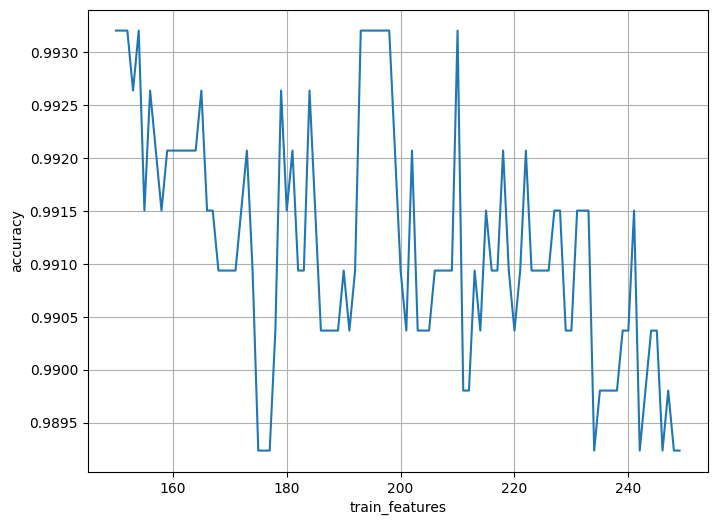

In [124]:
# accuracy_score 누적 결과 시각화
## accuracy_score 누적한 acc 변수를 plt.plot 함수를 사용하여 시각화 합니다.

plt.figure(figsize = (8,6))
plt.plot(acc)
plt.xlabel('train_features')
plt.ylabel('accuracy')
plt.grid()
plt.show()


In [ ]:
# 최고 정확도 Feature 개수 찾기
## agg 변수를 accuracy_score 기준 내림차순으로 정렬 합니다.(인덱스 재설정X)
## 인덱스 번호는 누적 학습된 feature의 개수 입니다.
## accuracy_score 값으로 내림차순 정렬 후 이 가장 첫번째 인덱스 번호가 가장 정확도가 좋은 feature 개수를 뜻합니다.

acc = acc.sort_values(by = 'accuracy_score', ascending = False)

acc


In [110]:
# 최고 정확도 Feature명 저장
## acc 에서 확인한 최고 결과 feature 개수 만큼 importance_sort['feature_name']를 슬라이싱 하여 importance_top 변수에 할당 합니다.
## 정확도 최고치 인덱스 값 +1 해서 슬라이싱 하세요.
## [TIP] 슬라이싱 할때 [:1] -> feature 0번 까지 짤림, [:100] -> feature 99번 까지 짤림

importance_top = importance_sort['feature_name'][:136]
importance_top


0                 angle(X,gravityMean)
1         fBodyGyro-bandsEnergy()-1,24
2               tGravityAcc-energy()-X
3         fBodyAcc-bandsEnergy()-1,8.2
4                fBodyAcc-skewness()-X
                    ...               
131      fBodyAcc-bandsEnergy()-9,16.1
132        tBodyGyroJerk-arCoeff()-X,3
133    fBodyGyro-bandsEnergy()-49,56.2
134                   fBodyAcc-std()-Y
135             tBodyAccMag-arCoeff()4
Name: feature_name, Length: 136, dtype: object

In [111]:
# 중요 feature 저장
# importance_top 변수를 인덱스 미포함하여 'importance_top.csv' 파일로 저장 합니다.
# 저장경로는 현재 경로의 하위 './data' 폴더로 지정해 주세요.

importance_top.to_csv('importance_top.csv')


In [112]:
# 훈련 데이터 생성
# x_train_top 변수에 x_train을 중요 feature 만큼 슬라이싱 한 x_train[importance_top] 할당
# x_val_top 변수에 x_val을 중요 feature 만큼 슬라이싱 한 x_val[importance_top] 할당


x_train_top = x_train[importance_top]
x_val_top = x_val[importance_top]


In [113]:
# 베스트 feature 개수 적용 모델링
## XGBClassifier 모듈에 베스트 파라미터를 적용하여 모델을 생성 및 초기화 합니다.
## 파라미터는 params 변수에 사용된 파라미터와, random_state=2023 으로 설정해 주세요.
## 이때 생성한 모델을 hpt_xgb_top_model 변수에 할당 합니다.
## 모델이 생성되면 최적의 feature 개수만 선별한 x_train_top 데이터와 y_train 으로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 x_val_top의 결과를 예측하고 결과를 hpt_xgb_top_pred 변수에 할당 합니다.

hpt_xgb_top_model = XGBClassifier(params = params, random_state = 2023)
hpt_xgb_top_model.fit(x_train_top, y_train)
hpt_xgb_top_pred = hpt_xgb_top_model.predict(x_val_top)

hpt_xgb_top_pred


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:09:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [114]:
# hpt_xgb_top_model 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_val, hpt_xgb_top_pred))
print(confusion_matrix(y_val, hpt_xgb_top_pred))
print(classification_report(y_val, hpt_xgb_top_pred))

0.9903682719546743
[[320   6   0   0   0   0]
 [  8 320   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 269   2   0]
 [  0   0   0   0 254   0]
 [  0   0   0   1   0 231]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       0.98      0.98      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      0.99      0.99       271
           4       0.99      1.00      1.00       254
           5       1.00      1.00      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [115]:
# hpt_xgb_top_model 예측결과 저장
## result 데이터프레임 8번 인덱스에 'hpt_xgb_top'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.

result.loc[8] = ['hpt_xgb_top', 'train', accuracy_score(y_val, hpt_xgb_top_pred), f1_score(y_val, hpt_xgb_top_pred, average = 'macro')]

result


,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983569,0.985092
2,knn,train,0.956374,0.960021
3,gbc,train,0.981870,0.983141
4,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.990368,0.991033
6,hpt_xgb_150,train,0.989802,0.990417
7,hpt_xgb_50,train,0.989802,0.990417
8,hpt_xgb_top,train,0.990368,0.990927


---
---

### (4) 결과 저장 및 시각화

In [116]:
# 결과 저장
# result 변수를 인덱스 미포함하여 'result4.csv' 파일로 저장 합니다.
# 저장경로는 현재 경로의 하위 './data' 폴더로 지정해 주세요.

result.to_csv('result4.csv')


In [117]:
# 저장 여부 확인
## 데이터가 파일로 잘 저장 되었는지 result4.csv 파일을 로드하여 확인 합니다.
## 로드한 데이터는 save_check 변수에 할당해 주세요.

save_check = pd.read_csv('result4.csv')

save_check

,Unnamed: 0,model_name,valid_data,accuracy_score,f1_score
0,0,svc,train,0.968839,0.971715
1,1,lr,train,0.983569,0.985092
2,2,knn,train,0.956374,0.960021
3,3,gbc,train,0.981870,0.983141
4,4,xgb,train,0.990368,0.991178
5,5,hpt_xgb,train,0.990368,0.991033
6,6,hpt_xgb_150,train,0.989802,0.990417
7,7,hpt_xgb_50,train,0.989802,0.990417
8,8,hpt_xgb_top,train,0.990368,0.990927


*  model_name 별 accuracy_score, f1_score 시각화(수직 그래프) 


In [118]:
# 컬럼-인덱스 변환
## save_check 데이터 프레임의 ['model_name', 'valid_data'] 컬럼을 지정하여 인덱스로 설정해 줍니다.
## 변환한 값은 result_comp 변수에 할당해 주세요.

result_comp = save_check.set_index(['model_name', 'valid_data'], drop = True)
result_comp = result_comp.drop('Unnamed: 0', axis = 1)
result_comp


,,accuracy_score,f1_score
model_name,valid_data,,
svc,train,0.968839,0.971715
lr,train,0.983569,0.985092
knn,train,0.956374,0.960021
gbc,train,0.981870,0.983141
xgb,train,0.990368,0.991178
hpt_xgb,train,0.990368,0.991033
hpt_xgb_150,train,0.989802,0.990417
hpt_xgb_50,train,0.989802,0.990417
hpt_xgb_top,train,0.990368,0.990927


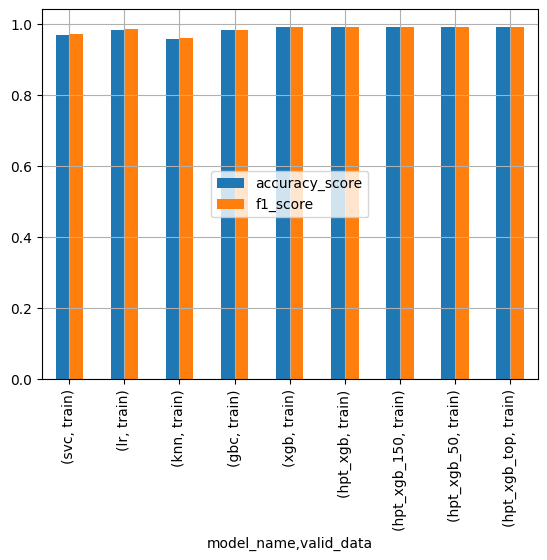

In [119]:
# 모델별 결과 시각화
# pandas의 plot 함수을 사용하여 AI모델 별 accuracy_score, f1_score 수직 그래프 시각화 합니다.
# grid를 추가해 주세요.
# legend를 표시하고, 위치는 center 입니다.

result_comp.plot(kind = 'bar')
plt.legend(loc = 'center')
plt.grid()
plt.show()


In [120]:
## 모델 저장하기
## 오늘 만들었던 최고 성능의 모델과 학습 데이터를 저장 합니다.
## 아래의 코드에서 한글로 씌여진 곳에 본인이 생성한 변수명을 기입해 주세요.

import joblib

joblib.dump(hpt_xgb_top_model, 'hpt_xgb_top_model.pkl')
joblib.dump(importance_top, 'importance_top.pkl')

joblib.dump(x_train_top, 'x_train_top.pkl')
joblib.dump(y_train, 'y_train.pkl')


['y_train.pkl']

----------

## 수고하셨습니다

----------